## Import Libraries

In [202]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Q2.1

In [203]:
airplane_crashes=pd.read_csv('airplane_crashes.csv')
airplane_crashes.head(5)

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

## Q2.2

In [204]:
airplane_crashes.rename(columns={'Location': 'Crash_Location', 'Operator': 'Airline_Operator',
                         'Type': 'Aircraft_Type', 'Registration': 'Registration_Number',
                         'Aboard': 'People_Aboard', 'Fatalities': 'Fatalities_Aboard',
                         'Ground': 'Ground_Fatalities', 'Summary': 'Event_Info'                        
                        }, inplace=True)

In [205]:
airplane_crashes.head(5)

Date   Time                      Crash_Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

         Airline_Operator Flight #          Route           Aircraft_Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration_Number cn/In  People_Aboard  Fatalities_Aboard  \
0                 NaN     1            2.0                1.0   
1                 NaN   NaN            5.0                5.0   
2                 NaN   NaN            1.0                1.0   
3                 NaN   NaN           20.0               14.0   
4                 NaN   NaN           30.0               30.0   

   Ground_Fatalities                                         Event_Info  
0                0.0  During a demonstration flight, a U.S. Army fly...  
1                0.0  First U.S. dirigible Akron exploded just offsh...  
2                0.0  The first fatal airplane accident in Canada oc...  
3                0.0  The airship flew into a thunderstorm and encou...  
4                0.0  Hydrogen gas which was being vented was sucked...

## Q2.3

In [206]:
print(f"Row count: {airplane_crashes.shape[0]}")
print(f"Column count: {airplane_crashes.shape[1]}")
print(f"Number of elements: {airplane_crashes.size}")

Row count: 5268
Column count: 13
Number of elements: 68484


## Q2.4

In [207]:
airplane_crashes.head(10)

Date   Time                      Crash_Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   
5  03/05/1915  01:00                     Tienen, Belgium   
6  09/03/1915  15:20               Off Cuxhaven, Germany   
7  07/28/1916    NaN               Near Jambol, Bulgeria   
8  09/24/1916  01:00                 Billericay, England   
9  10/01/1916  23:45                Potters Bar, England   

         Airline_Operator Flight #          Route  \
0    Military - U.S. Army      NaN  Demonstration   
1    Military - U.S. Navy      NaN    Test flight   
2                 Private        -            NaN   
3  Military - German Navy      NaN            NaN   
4  Military - German Navy      NaN            NaN   
5  Military - German Navy      NaN            NaN   
6  Military - German Navy      NaN            NaN   
7  Military - German Army      NaN            NaN   
8  Military - German Navy      NaN            NaN   
9  Military - German Navy      NaN            NaN   

                   Aircraft_Type Registration_Number cn/In  People_Aboard  \
0               Wright Flyer III                 NaN     1            2.0   
1                      Dirigible                 NaN   NaN            5.0   
2               Curtiss seaplane                 NaN   NaN            1.0   
3         Zeppelin L-1 (airship)                 NaN   NaN           20.0   
4         Zeppelin L-2 (airship)                 NaN   NaN           30.0   
5         Zeppelin L-8 (airship)                 NaN   NaN           41.0   
6        Zeppelin L-10 (airship)                 NaN   NaN           19.0   
7  Schutte-Lanz S-L-10 (airship)                 NaN   NaN           20.0   
8        Zeppelin L-32 (airship)                 NaN   NaN           22.0   
9        Zeppelin L-31 (airship)                 NaN   NaN           19.0   

   Fatalities_Aboard  Ground_Fatalities  \
0                1.0                0.0   
1                5.0                0.0   
2                1.0                0.0   
3               14.0                0.0   
4               30.0                0.0   
5               21.0                0.0   
6               19.0                0.0   
7               20.0                0.0   
8               22.0                0.0   
9               19.0                0.0   

                                          Event_Info  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...  
5  Crashed into trees while attempting to land af...  
6  Exploded and burned near Neuwerk Island,  when...  
7         Crashed near the Black Sea, cause unknown.  
8  Shot down by British aircraft crashing in flames.  
9  Shot down in flames by the British 39th Home D...

In [208]:
airplane_crashes.describe(include='all')

Date   Time     Crash_Location Airline_Operator Flight #  \
count         5268   3049               5248             5250     1069   
unique        4753   1005               4303             2476      724   
top     09/11/2001  15:00  Sao Paulo, Brazil         Aeroflot        -   
freq             4     32                 15              179       67   
mean           NaN    NaN                NaN              NaN      NaN   
std            NaN    NaN                NaN              NaN      NaN   
min            NaN    NaN                NaN              NaN      NaN   
25%            NaN    NaN                NaN              NaN      NaN   
50%            NaN    NaN                NaN              NaN      NaN   
75%            NaN    NaN                NaN              NaN      NaN   
max            NaN    NaN                NaN              NaN      NaN   

           Route Aircraft_Type Registration_Number cn/In  People_Aboard  \
count       3562          5241                4933  4040    5246.000000   
unique      3244          2446                4905  3707            NaN   
top     Training  Douglas DC-3                  49   178            NaN   
freq          81           334                   3     6            NaN   
mean         NaN           NaN                 NaN   NaN      27.554518   
std          NaN           NaN                 NaN   NaN      43.076711   
min          NaN           NaN                 NaN   NaN       0.000000   
25%          NaN           NaN                 NaN   NaN       5.000000   
50%          NaN           NaN                 NaN   NaN      13.000000   
75%          NaN           NaN                 NaN   NaN      30.000000   
max          NaN           NaN                 NaN   NaN     644.000000   

        Fatalities_Aboard  Ground_Fatalities               Event_Info  
count         5256.000000        5246.000000                     4878  
unique                NaN                NaN                     4673  
top                   NaN                NaN  Crashed during takeoff.  
freq                  NaN                NaN                       15  
mean            20.068303           1.608845                      NaN  
std             33.199952          53.987827                      NaN  
min              0.000000           0.000000                      NaN  
25%              3.000000           0.000000                      NaN  
50%              9.000000           0.000000                      NaN  
75%             23.000000           0.000000                      NaN  
max            583.000000        2750.000000                      NaN

In [209]:
airplane_crashes.info

<bound method DataFrame.info of             Date   Time                                     Crash_Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                     Airline_Op

In [210]:
airplane_crashes.dtypes

Date                    object
Time                    object
Crash_Location          object
Airline_Operator        object
Flight #                object
Route                   object
Aircraft_Type           object
Registration_Number     object
cn/In                   object
People_Aboard          float64
Fatalities_Aboard      float64
Ground_Fatalities      float64
Event_Info              object
dtype: object

## Q2.5

In [211]:
airplane_crashes['Date'] = pd.to_datetime(airplane_crashes['Date'])

In [212]:
airplane_crashes.dtypes

Date                   datetime64[ns]
Time                           object
Crash_Location                 object
Airline_Operator               object
Flight #                       object
Route                          object
Aircraft_Type                  object
Registration_Number            object
cn/In                          object
People_Aboard                 float64
Fatalities_Aboard             float64
Ground_Fatalities             float64
Event_Info                     object
dtype: object

In [213]:
airplane_crashes.head(5)

Date   Time                      Crash_Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1912-07-12  06:30             AtlantiCity, New Jersey   
2 1913-08-06    NaN  Victoria, British Columbia, Canada   
3 1913-09-09  18:30                  Over the North Sea   
4 1913-10-17  10:30          Near Johannisthal, Germany   

         Airline_Operator Flight #          Route           Aircraft_Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration_Number cn/In  People_Aboard  Fatalities_Aboard  \
0                 NaN     1            2.0                1.0   
1                 NaN   NaN            5.0                5.0   
2                 NaN   NaN            1.0                1.0   
3                 NaN   NaN           20.0               14.0   
4                 NaN   NaN           30.0               30.0   

   Ground_Fatalities                                         Event_Info  
0                0.0  During a demonstration flight, a U.S. Army fly...  
1                0.0  First U.S. dirigible Akron exploded just offsh...  
2                0.0  The first fatal airplane accident in Canada oc...  
3                0.0  The airship flew into a thunderstorm and encou...  
4                0.0  Hydrogen gas which was being vented was sucked...

## Q2.6

In [214]:
airplane_crashes['Year'] = pd. DatetimeIndex(airplane_crashes['Date']).year
airplane_crashes['Month'] = pd. DatetimeIndex(airplane_crashes['Date']).month
airplane_crashes['Day'] = pd. DatetimeIndex(airplane_crashes['Date']).day
##airplane_crashes.drop(['Date'],axis=1,inplace=True)
airplane_crashes=airplane_crashes.iloc[:, [12,13,14,15,0,1,2,3,4,5,6,7,8,9,10,11]]
airplane_crashes.head(5)

Event_Info  Year  Month  Day  \
0  During a demonstration flight, a U.S. Army fly...  1908      9   17   
1  First U.S. dirigible Akron exploded just offsh...  1912      7   12   
2  The first fatal airplane accident in Canada oc...  1913      8    6   
3  The airship flew into a thunderstorm and encou...  1913      9    9   
4  Hydrogen gas which was being vented was sucked...  1913     10   17   

        Date   Time                      Crash_Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1912-07-12  06:30             AtlantiCity, New Jersey   
2 1913-08-06    NaN  Victoria, British Columbia, Canada   
3 1913-09-09  18:30                  Over the North Sea   
4 1913-10-17  10:30          Near Johannisthal, Germany   

         Airline_Operator Flight #          Route           Aircraft_Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration_Number cn/In  People_Aboard  Fatalities_Aboard  \
0                 NaN     1            2.0                1.0   
1                 NaN   NaN            5.0                5.0   
2                 NaN   NaN            1.0                1.0   
3                 NaN   NaN           20.0               14.0   
4                 NaN   NaN           30.0               30.0   

   Ground_Fatalities  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

## Q2.7

In [215]:
airplane_crashes['Total_Fatalities']=airplane_crashes['Fatalities_Aboard']+airplane_crashes['Ground_Fatalities']

C:\Users\Student\AppData\Local\Temp/ipykernel_5372/3418992625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_crashes['Total_Fatalities']=airplane_crashes['Fatalities_Aboard']+airplane_crashes['Ground_Fatalities']


In [216]:
airplane_crashes.head(10)

Event_Info  Year  Month  Day  \
0  During a demonstration flight, a U.S. Army fly...  1908      9   17   
1  First U.S. dirigible Akron exploded just offsh...  1912      7   12   
2  The first fatal airplane accident in Canada oc...  1913      8    6   
3  The airship flew into a thunderstorm and encou...  1913      9    9   
4  Hydrogen gas which was being vented was sucked...  1913     10   17   
5  Crashed into trees while attempting to land af...  1915      3    5   
6  Exploded and burned near Neuwerk Island,  when...  1915      9    3   
7         Crashed near the Black Sea, cause unknown.  1916      7   28   
8  Shot down by British aircraft crashing in flames.  1916      9   24   
9  Shot down in flames by the British 39th Home D...  1916     10    1   

        Date   Time                      Crash_Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1912-07-12  06:30             AtlantiCity, New Jersey   
2 1913-08-06    NaN  Victoria, British Columbia, Canada   
3 1913-09-09  18:30                  Over the North Sea   
4 1913-10-17  10:30          Near Johannisthal, Germany   
5 1915-03-05  01:00                     Tienen, Belgium   
6 1915-09-03  15:20               Off Cuxhaven, Germany   
7 1916-07-28    NaN               Near Jambol, Bulgeria   
8 1916-09-24  01:00                 Billericay, England   
9 1916-10-01  23:45                Potters Bar, England   

         Airline_Operator Flight #          Route  \
0    Military - U.S. Army      NaN  Demonstration   
1    Military - U.S. Navy      NaN    Test flight   
2                 Private        -            NaN   
3  Military - German Navy      NaN            NaN   
4  Military - German Navy      NaN            NaN   
5  Military - German Navy      NaN            NaN   
6  Military - German Navy      NaN            NaN   
7  Military - German Army      NaN            NaN   
8  Military - German Navy      NaN            NaN   
9  Military - German Navy      NaN            NaN   

                   Aircraft_Type Registration_Number cn/In  People_Aboard  \
0               Wright Flyer III                 NaN     1            2.0   
1                      Dirigible                 NaN   NaN            5.0   
2               Curtiss seaplane                 NaN   NaN            1.0   
3         Zeppelin L-1 (airship)                 NaN   NaN           20.0   
4         Zeppelin L-2 (airship)                 NaN   NaN           30.0   
5         Zeppelin L-8 (airship)                 NaN   NaN           41.0   
6        Zeppelin L-10 (airship)                 NaN   NaN           19.0   
7  Schutte-Lanz S-L-10 (airship)                 NaN   NaN           20.0   
8        Zeppelin L-32 (airship)                 NaN   NaN           22.0   
9        Zeppelin L-31 (airship)                 NaN   NaN           19.0   

   Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  
0                1.0                0.0               1.0  
1                5.0                0.0               5.0  
2                1.0                0.0               1.0  
3               14.0                0.0              14.0  
4               30.0                0.0              30.0  
5               21.0                0.0              21.0  
6               19.0                0.0              19.0  
7               20.0                0.0              20.0  
8               22.0                0.0              22.0  
9               19.0                0.0              19.0

## Q2.7.1

In [217]:
print(f"Max Number of Fatalities in 1 airplane crash: {airplane_crashes['Total_Fatalities'].max()}")

Max Number of Fatalities in 1 airplane crash: 2842.0


## Q2.7.2

In [218]:
Max_crash=airplane_crashes[airplane_crashes['Total_Fatalities']==airplane_crashes['Total_Fatalities'].max()]
print(f"Date of Max Number of Fatalities in 1 airplane crash: {Max_crash['Year'].max()}-{Max_crash['Month'].max()}-{Max_crash['Day'].max()}")

Date of Max Number of Fatalities in 1 airplane crash: 2001-9-11


## Q2.7.3

In [219]:
print(f"Info:\n {Max_crash['Event_Info'].max()}")

Info:
 The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.


## Q2.8

In [220]:
airplane_crashes['Airline_Operator'].value_counts().head(20)

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
China National Aviation Corporation     44
United Air Lines                        44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
Military - U.S. Navy                    36
American Airlines                       36
US Aerial Mail Service                  36
Military - Royal Air Force              36
Indian Airlines                         34
KLM Royal Dutch Airlines                33
Philippine Air Lines                    33
Private                                 31
Aeropostale                             26
Northwest Orient Airlines               25
Eastern Air Lines                       25
Name: Airline_Operator, dtype: int64

## Q2.9

In [221]:
Crash_Operators=airplane_crashes['Airline_Operator'].value_counts()
print(f"Percentage of Airways: {((Crash_Operators['South African Airways']/Crash_Operators.sum())*100).round(2)}%")

Percentage of Airways: 0.11%


## Q2.10

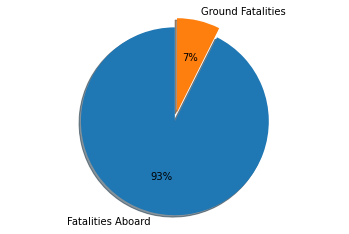

In [222]:
labels = 'Fatalities Aboard', 'Ground Fatalities'
sizes = [airplane_crashes["Fatalities_Aboard"].sum(),airplane_crashes["Ground_Fatalities"].sum()]
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Q2.11
Most airplane crashe fatalities come from Fatalities Aboard as compared to Ground Fatalities

## Q2.12

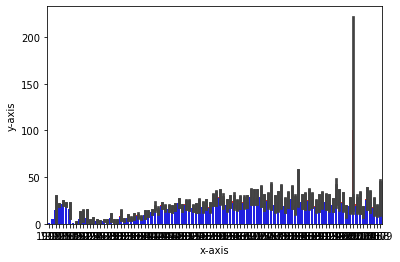

In [223]:
import seaborn as sns


# creating dataframe
df = pd.DataFrame({
 'X': airplane_crashes['Year'],
 'Y': airplane_crashes['Total_Fatalities'],
 'Z': airplane_crashes['Fatalities_Aboard']
})

# creating subplots
ax = plt.subplots()

# plotting columns
ax = sns.barplot(x=df["X"], y=df["Y"], color='red')
ax = sns.barplot(x=df["X"], y=df["Z"], color='blue')

# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")

# visualizing illustration
plt.show()


## Q2.13
It does confirm that most airplane crashe fatalities come from Fatalities Aboard as compared to Ground Fatalities and Total Fatalities

## Q2.14

In [237]:
print(f"Aircraft Type that had the highest sum of Fatalities Aboard: {pd.DataFrame(airplane_crashes.groupby(['Aircraft_Type'],sort=['Fatalities_Aboard']))[0][0]}")

Aircraft Type that had the highest sum of Fatalities Aboard: AAC-1 Toucan


## Q2.15

In [175]:
airplane_crashes.drop(['Date','Time','Flight #','Registration_Number','cn/In','Event_Info'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [176]:
airplane_crashes.head(10)

Year  Month  Day                      Crash_Location  \
0  1908      9   17                 Fort Myer, Virginia   
1  1912      7   12             AtlantiCity, New Jersey   
2  1913      8    6  Victoria, British Columbia, Canada   
3  1913      9    9                  Over the North Sea   
4  1913     10   17          Near Johannisthal, Germany   
5  1915      3    5                     Tienen, Belgium   
6  1915      9    3               Off Cuxhaven, Germany   
7  1916      7   28               Near Jambol, Bulgeria   
8  1916      9   24                 Billericay, England   
9  1916     10    1                Potters Bar, England   

         Airline_Operator          Route                  Aircraft_Type  \
0    Military - U.S. Army  Demonstration               Wright Flyer III   
1    Military - U.S. Navy    Test flight                      Dirigible   
2                 Private            NaN               Curtiss seaplane   
3  Military - German Navy            NaN         Zeppelin L-1 (airship)   
4  Military - German Navy            NaN         Zeppelin L-2 (airship)   
5  Military - German Navy            NaN         Zeppelin L-8 (airship)   
6  Military - German Navy            NaN        Zeppelin L-10 (airship)   
7  Military - German Army            NaN  Schutte-Lanz S-L-10 (airship)   
8  Military - German Navy            NaN        Zeppelin L-32 (airship)   
9  Military - German Navy            NaN        Zeppelin L-31 (airship)   

   People_Aboard  Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  
0            2.0                1.0                0.0               1.0  
1            5.0                5.0                0.0               5.0  
2            1.0                1.0                0.0               1.0  
3           20.0               14.0                0.0              14.0  
4           30.0               30.0                0.0              30.0  
5           41.0               21.0                0.0              21.0  
6           19.0               19.0                0.0              19.0  
7           20.0               20.0                0.0              20.0  
8           22.0               22.0                0.0              22.0  
9           19.0               19.0                0.0              19.0

## Q2.16

In [177]:
airplane_crashes.isnull().sum()

Year                    0
Month                   0
Day                     0
Crash_Location         20
Airline_Operator       18
Route                1706
Aircraft_Type          27
People_Aboard          22
Fatalities_Aboard      12
Ground_Fatalities      22
Total_Fatalities       22
dtype: int64

In [178]:
airplane_crashes.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [179]:
airplane_crashes.isnull().sum()

Year                 0
Month                0
Day                  0
Crash_Location       0
Airline_Operator     0
Route                0
Aircraft_Type        0
People_Aboard        0
Fatalities_Aboard    0
Ground_Fatalities    0
Total_Fatalities     0
dtype: int64

## Q2.17

In [180]:
airplane_crashes.dtypes

Year                   int64
Month                  int64
Day                    int64
Crash_Location        object
Airline_Operator      object
Route                 object
Aircraft_Type         object
People_Aboard        float64
Fatalities_Aboard    float64
Ground_Fatalities    float64
Total_Fatalities     float64
dtype: object

In [181]:
label_encoder = LabelEncoder()

airplane_crashes['Airline_Operator'] = label_encoder.fit_transform(airplane_crashes['Airline_Operator'])
airplane_crashes['Aircraft_Type'] = label_encoder.fit_transform(airplane_crashes['Aircraft_Type'])

airplane_crashes.head(10)

C:\Users\Student\AppData\Local\Temp/ipykernel_5372/4126409852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_crashes['Airline_Operator'] = label_encoder.fit_transform(airplane_crashes['Airline_Operator'])
C:\Users\Student\AppData\Local\Temp/ipykernel_5372/4126409852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_crashes['Aircraft_Type'] = label_encoder.fit_transform(airplane_crashes['Aircraft_Type'])


Year  Month  Day              Crash_Location  Airline_Operator  \
0    1908      9   17         Fort Myer, Virginia              1186   
1    1912      7   12     AtlantiCity, New Jersey              1192   
56   1921      9    6               Paris, France               770   
80   1923     12   23  Over the Mediterranean Sea              1122   
83   1924      4   24    Over the English Channel               937   
96   1925      9    3              Caldwell, Ohio              1192   
102  1926      7    3   Rossaugpt, Czechoslovakia               608   
119  1927      8   22          Sevenoaks, England               937   
121  1927      9   17          Hadley, New Jersey              1435   
123  1927      9   23            Schleiz, Germany               664   

                                            Route  Aircraft_Type  \
0                                   Demonstration           1765   
1                                     Test flight            820   
56                  Varsovie - Strasbourg - Paris           1533   
80                               Toulon - Algiers           1776   
83   Lympne, England - Rotterdam, The Netherlands           1087   
96                  Lakehurst, NJ - S.t Louis, MO            821   
102                                Paris - Prague            613   
119                            Croydon - Schiphol           1084   
121                                   Sightseeing           1081   
123                               Berlin - Munich            831   

     People_Aboard  Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  
0              2.0                1.0                0.0               1.0  
1              5.0                5.0                0.0               5.0  
56             5.0                5.0                0.0               5.0  
80            52.0               52.0                0.0              52.0  
83             3.0                3.0                0.0               3.0  
96            43.0               14.0                0.0              14.0  
102            7.0                7.0                0.0               7.0  
119           11.0                1.0                0.0               1.0  
121           12.0                7.0                0.0               7.0  
123            6.0                6.0                0.0               6.0

In [186]:
clean_airplane_crashes = pd.concat([airplane_crashes, pd.get_dummies(airplane_crashes['Crash_Location'])], axis=1)
clean_airplane_crashes.drop(["Crash_Location"], axis=1, inplace=True)
clean_airplane_crashes.head(10)

Year  Month  Day  Airline_Operator  \
0    1908      9   17              1186   
1    1912      7   12              1192   
56   1921      9    6               770   
80   1923     12   23              1122   
83   1924      4   24               937   
96   1925      9    3              1192   
102  1926      7    3               608   
119  1927      8   22               937   
121  1927      9   17              1435   
123  1927      9   23               664   

                                            Route  Aircraft_Type  \
0                                   Demonstration           1765   
1                                     Test flight            820   
56                  Varsovie - Strasbourg - Paris           1533   
80                               Toulon - Algiers           1776   
83   Lympne, England - Rotterdam, The Netherlands           1087   
96                  Lakehurst, NJ - S.t Louis, MO            821   
102                                Paris - Prague            613   
119                            Croydon - Schiphol           1084   
121                                   Sightseeing           1081   
123                               Berlin - Munich            831   

     People_Aboard  Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  \
0              2.0                1.0                0.0               1.0   
1              5.0                5.0                0.0               5.0   
56             5.0                5.0                0.0               5.0   
80            52.0               52.0                0.0              52.0   
83             3.0                3.0                0.0               3.0   
96            43.0               14.0                0.0              14.0   
102            7.0                7.0                0.0               7.0   
119           11.0                1.0                0.0               1.0   
121           12.0                7.0                0.0               7.0   
123            6.0                6.0                0.0               6.0   

     ...  Zarate, Argentina  Zavnah, Mongolia  Zawoja, Poland  \
0    ...                  0                 0               0   
1    ...                  0                 0               0   
56   ...                  0                 0               0   
80   ...                  0                 0               0   
83   ...                  0                 0               0   
96   ...                  0                 0               0   
102  ...                  0                 0               0   
119  ...                  0                 0               0   
121  ...                  0                 0               0   
123  ...                  0                 0               0   

     Zephyr Cove, Nevada  Zeya, Russia  Zheng Zou AB, China  Zifta, Egypt  \
0                      0             0                    0             0   
1                      0             0                    0             0   
56                     0             0                    0             0   
80                     0             0                    0             0   
83                     0             0                    0             0   
96                     0             0                    0             0   
102                    0             0                    0             0   
119                    0             0                    0             0   
121                    0             0                    0             0   
123                    0             0                    0             0   

     Zurich, Switzerland  Zwingle, Iowa  near Orillia, Ontario, Canada  
0                      0              0                              0  
1                      0              0                              0  
56                     0              0                              0  
80                     0              0                            

## Q2.18

change Route to numeric

In [193]:
clean_airplane_crashes['Route'] = label_encoder.fit_transform(clean_airplane_crashes['Route'])
clean_airplane_crashes.head(10)

Year  Month  Day  Airline_Operator  Route  Aircraft_Type  People_Aboard  \
0    1908      9   17              1186    823           1765            2.0   
1    1912      7   12              1192   2955            820            5.0   
56   1921      9    6               770   3091           1533            5.0   
80   1923     12   23              1122   3000           1776           52.0   
83   1924      4   24               937   1684           1087            3.0   
96   1925      9    3              1192   1522            821           43.0   
102  1926      7    3               608   2270            613            7.0   
119  1927      8   22               937    760           1084           11.0   
121  1927      9   17              1435   2769           1081           12.0   
123  1927      9   23               664    329            831            6.0   

     Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  ...  \
0                  1.0                0.0               1.0  ...   
1                  5.0                0.0               5.0  ...   
56                 5.0                0.0               5.0  ...   
80                52.0                0.0              52.0  ...   
83                 3.0                0.0               3.0  ...   
96                14.0                0.0              14.0  ...   
102                7.0                0.0               7.0  ...   
119                1.0                0.0               1.0  ...   
121                7.0                0.0               7.0  ...   
123                6.0                0.0               6.0  ...   

     Zarate, Argentina  Zavnah, Mongolia  Zawoja, Poland  Zephyr Cove, Nevada  \
0                    0                 0               0                    0   
1                    0                 0               0                    0   
56                   0                 0               0                    0   
80                   0                 0               0                    0   
83                   0                 0               0                    0   
96                   0                 0               0                    0   
102                  0                 0               0                    0   
119                  0                 0               0                    0   
121                  0                 0               0                    0   
123                  0                 0               0                    0   

     Zeya, Russia  Zheng Zou AB, China  Zifta, Egypt  Zurich, Switzerland  \
0               0                    0             0                    0   
1               0                    0             0                    0   
56              0                    0             0                    0   
80              0                    0             0                    0   
83              0                    0             0                    0   
96              0                    0             0                    0   
102             0                    0             0                    0   
119             0                    0             0                    0   
121             0                    0             0                    0   
123             0                    0             0                    0   

     Zwingle, Iowa  near Orillia, Ontario, Canada  
0                0                              0  
1                0                              0  
56               0                              0  
80               0                              0  
83               0                              0  
96               0                              0  
102              0                              0  
119              0                              0  
121              0                              0  
123              0                              0  

[10 rows x 2966 columns]

In [199]:
scaler = StandardScaler()
final_clean_airplane_crashes=pd.DataFrame(scaler.fit_transform(clean_airplane_crashes))
final_clean_airplane_crashes.columns=clean_airplane_crashes.columns
final_clean_airplane_crashes.head(10)

Year     Month       Day  Airline_Operator     Route  Aircraft_Type  \
0 -3.231328  0.675396  0.157544          0.454205 -0.884068       1.612166   
1 -3.040270  0.111475 -0.411840          0.465124  1.371339      -0.278671   
2 -2.610388  0.675396 -1.095102         -0.302856  1.515211       1.147961   
3 -2.514859  1.521278  0.840805          0.337734  1.418943       1.634176   
4 -2.467094 -0.734407  0.954682          0.001060  0.026769       0.255565   
5 -2.419330  0.675396 -1.436732          0.465124 -0.144608      -0.276670   
6 -2.371565  0.111475 -1.436732         -0.597673  0.646689      -0.692855   
7 -2.323801  0.393435  0.726929          0.001060 -0.950715       0.249563   
8 -2.323801  0.675396  0.157544          0.907350  1.174572       0.243560   
9 -2.323801  0.675396  0.840805         -0.495761 -1.406663      -0.256661   

   People_Aboard  Fatalities_Aboard  Ground_Fatalities  Total_Fatalities  ...  \
0      -0.629195          -0.593271          -0.031997         -0.320668  ...   
1      -0.568773          -0.488468          -0.031997         -0.268834  ...   
2      -0.568773          -0.488468          -0.031997         -0.268834  ...   
3       0.377834           0.742957          -0.031997          0.340218  ...   
4      -0.609054          -0.540870          -0.031997         -0.294751  ...   
5       0.196569          -0.252664          -0.031997         -0.152207  ...   
6      -0.528492          -0.436067          -0.031997         -0.242917  ...   
7      -0.447930          -0.593271          -0.031997         -0.320668  ...   
8      -0.427789          -0.436067          -0.031997         -0.242917  ...   
9      -0.548632          -0.462268          -0.031997         -0.255876  ...   

   Zarate, Argentina  Zavnah, Mongolia  Zawoja, Poland  Zephyr Cove, Nevada  \
0          -0.016831         -0.016831       -0.016831            -0.016831   
1          -0.016831         -0.016831       -0.016831            -0.016831   
2          -0.016831         -0.016831       -0.016831            -0.016831   
3          -0.016831         -0.016831       -0.016831            -0.016831   
4          -0.016831         -0.016831       -0.016831            -0.016831   
5          -0.016831         -0.016831       -0.016831            -0.016831   
6          -0.016831         -0.016831       -0.016831            -0.016831   
7          -0.016831         -0.016831       -0.016831            -0.016831   
8          -0.016831         -0.016831       -0.016831            -0.016831   
9          -0.016831         -0.016831       -0.016831            -0.016831   

   Zeya, Russia  Zheng Zou AB, China  Zifta, Egypt  Zurich, Switzerland  \
0     -0.016831            -0.016831     -0.016831            -0.033677   
1     -0.016831            -0.016831     -0.016831            -0.033677   
2     -0.016831            -0.016831     -0.016831            -0.033677   
3     -0.016831            -0.016831     -0.016831            -0.033677   
4     -0.016831            -0.016831     -0.016831            -0.033677   
5     -0.016831            -0.016831     -0.016831            -0.033677   
6     -0.016831            -0.016831     -0.016831            -0.033677   
7     -0.016831            -0.016831     -0.016831            -0.033677   
8     -0.016831            -0.016831     -0.016831            -0.033677   
9     -0.016831            -0.016831     -0.016831            -0.033677   

   Zwingle, Iowa  near Orillia, Ontario, Canada  
0      -0.016831                      -0.016831  
1      -0.016831                      -0.016831  
2      -0.016831                      -0.016831  
3      -0.016831                      -0.016831  
4      -0.016831                      -0.016831  
5      -0.016831                      -0.016831  
6      -0.016831                      -0.016831  
7      -0.016831                      -0.016831  
8      -0.016831                      -0.016831  
9      -0.016831                      -0.016831  

[10 rows 

## Q2.19

In [ ]:
final_clean_airplane_crashes.to_csv('clean_airplane_crashes.csv')